In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [2]:
def PolyArea(x,y):
    """https://stackoverflow.com/questions/24467972/calculate-area-of-polygon-given-x-y-coordinates"""
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def tpc2npc(tpc):
    steps = list("FCGDAEB")
    pcs = [ p *7 % 12 for p in range(-1,6) ]
    d = {s:p for s, p in zip(steps, pcs)}
    
    step, acc = tpc[0], tpc[1:]
    if "#" in acc:
        direction = 1
    elif "b" in acc:
        direction = -1
    else:
        direction = 0
    wind = len(acc)
    return ( d[step] + (wind * direction) ) % 12

def fifths_area(dist_in_chromatic_order):
    piece = dist_in_chromatic_order.reindex(fifths_order)
    piece /= piece.sum()
    x = piece.values * np.cos(angles)
    x = np.append(x,x[0])
    y = piece.values * np.sin(angles)
    y = np.append(y,y[0])
    
    A = PolyArea(x,y)
    return A

def chromatic_area(dist_in_chromatic_order):
    piece = dist_in_chromatic_order
    piece /= piece.sum()
    x = piece.values * np.cos(angles)
    x = np.append(x,x[0])
    y = piece.values * np.sin(angles)
    y = np.append(y,y[0])
    
    A = PolyArea(x,y)
    return A

### Get and preprocess data

In [19]:
data = pd.read_csv("https://raw.githubusercontent.com/DCMLab/TP3C/refs/heads/master/tp3c.tsv", sep="\t")
data.columns

Index(['composer', 'composer_first', 'work_group', 'work_catalogue', 'opus',
       'no', 'mov', 'title', 'composition', 'publication', 'source',
       'display_year', 'Fbb', 'Cbb', 'Gbb', 'Dbb', 'Abb', 'Ebb', 'Bbb', 'Fb',
       'Cb', 'Gb', 'Db', 'Ab', 'Eb', 'Bb', 'F', 'C', 'G', 'D', 'A', 'E', 'B',
       'F#', 'C#', 'G#', 'D#', 'A#', 'E#', 'B#', 'F##', 'C##', 'G##', 'D##',
       'A##', 'E##', 'B##'],
      dtype='object')

In [20]:
data = data.sort_values(by="display_year").reset_index(drop=True)

In [21]:
data = data[["composer", "composer_first", "opus", "no", "mov", "title", "display_year", 'Fbb', 'Cbb', 'Gbb', 'Dbb', 'Abb', 'Ebb', 'Bbb', 'Fb',
       'Cb', 'Gb', 'Db', 'Ab', 'Eb', 'Bb', 'F', 'C', 'G', 'D', 'A', 'E', 'B',
       'F#', 'C#', 'G#', 'D#', 'A#', 'E#', 'B#', 'F##', 'C##', 'G##', 'D##',
       'A##', 'E##', 'B##']]

In [22]:
data.head()

,composer,composer_first,opus,no,mov,title,display_year,Fbb,Cbb,Gbb,...,A#,E#,B#,F##,C##,G##,D##,A##,E##,B##
0,Vitry,Philippede,NaN,NaN,NaN,Virtutibus laudabilis,1361.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vitry,Philippede,NaN,NaN,NaN,Gratissima virginis species,1361.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Vitry,Philippede,NaN,NaN,NaN,Lugentium siccentur,1361.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Vitry,Philippede,NaN,NaN,NaN,Rex quem metrorum,1361.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Machaut,Guillaume de,NaN,NaN,NaN,Gloria,1370.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# create npc columns
for i in range(12):
    data.loc[:,i] = 0

In [24]:
# iterate over tpc columns and add to npc cols
for col in ['Fbb', 'Cbb', 'Gbb', 'Dbb', 'Abb', 'Ebb', 'Bbb', 'Fb',
       'Cb', 'Gb', 'Db', 'Ab', 'Eb', 'Bb', 'F', 'C', 'G', 'D', 'A', 'E', 'B',
       'F#', 'C#', 'G#', 'D#', 'A#', 'E#', 'B#', 'F##', 'C##', 'G##', 'D##',
       'A##', 'E##', 'B##']:
    data[tpc2npc(col)] += data[col]

In [25]:
data[(data.composer=="Corelli") & (data.display_year==1689.0) & (data.loc[:,2]==342.0)]

,composer,composer_first,opus,no,mov,title,display_year,Fbb,Cbb,Gbb,...,2,3,4,5,6,7,8,9,10,11


In [26]:
npcs = data[[i for i in range(12)]]
# normalize
npcs = npcs.div(npcs.sum(axis=1), axis=0)

In [125]:
piece =  595 # 328

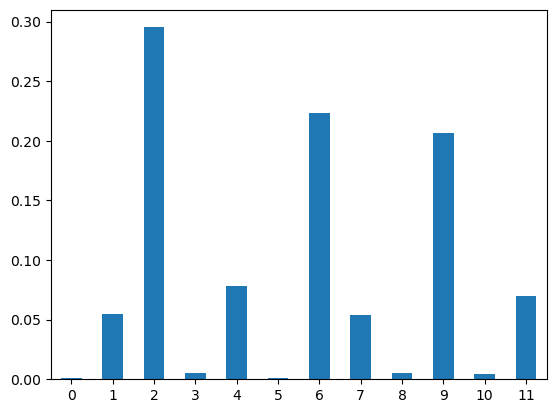

In [126]:
npcs.iloc[piece,:].plot(kind="bar", rot=0)
plt.show()

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

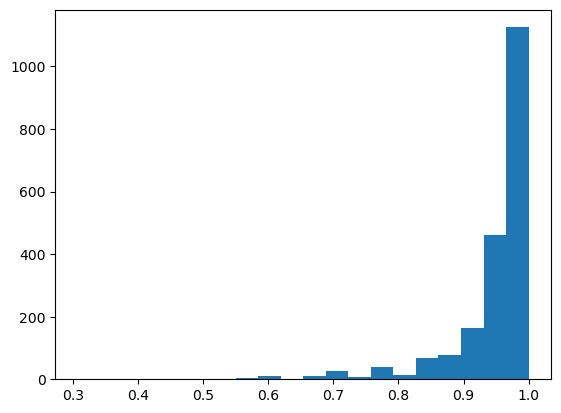

In [127]:
## MUTUAL INFORMATION
from sklearn.metrics import normalized_mutual_info_score

X = data.loc[piece,[i for i in range(12)]].values
X = [i for i, x in enumerate(X) for _ in range(x)]
Y = data.loc[piece,[i * 7 % 12 for i in range(12)]].reset_index(drop=True).values
Y = [i for i, x in enumerate(Y) for _ in range(x)]


print(X)
print(Y)
print(normalized_mutual_info_score(X,Y))

MIs = []
for i in range(data.shape[0]):
    X = data.loc[i,[i for i in range(12)]]
    Y = data.loc[i,[i * 7 % 12 for i in range(12)]].reset_index(drop=True)
    MIs.append(normalized_mutual_info_score(X,Y))

data["MI"] = MIs

plt.hist(data.MI, bins=20);

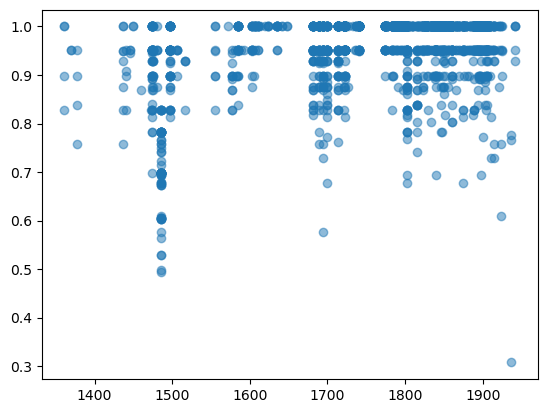

In [128]:
plt.scatter(data.display_year, data.MI, alpha=0.5)

In [129]:
data.sort_values(by="MI", ascending=False).sample(10)

,composer,composer_first,opus,no,mov,title,display_year,Fbb,Cbb,Gbb,...,3,4,5,6,7,8,9,10,11,MI
1016,Reichardt,Louise,NaN,7,NaN,Poesia di Metastasio II,1802.5,0,0,0,...,39,16,140,0,30,1,35,107,0,0.897487
325,Gesualdo,Carlo,NaN,NaN,NaN,Moro lasso,1613.0,0,0,0,...,17,119,69,21,76,12,120,12,79,1.000000
1743,Strauss,Richard,27,4,NaN,Morgen,1894.0,0,0,0,...,13,53,3,29,70,12,79,0,101,0.951243
720,Händel,Georg Friedrich,264,NaN,2,The ways of Zion do mourn,1737.0,0,0,0,...,105,63,214,44,332,22,243,175,28,1.000000
518,Corelli,Arcangelo,5,10,4.0,NaN,1700.0,0,0,0,...,0,14,30,0,22,0,18,8,2,0.828667
906,Mozart,Wolfgang Amadeus,626,NaN,NaN,Confutatis,1791.0,0,0,0,...,77,187,132,80,140,86,202,79,129,1.000000
1656,Fauré,Gabriel,23,1,NaN,Les berceaux,1879.0,0,0,0,...,74,11,231,58,10,85,28,152,12,1.000000
1485,Schumann,Clara,23,1,NaN,"Was weinst du, Blümlein?",1853.0,0,0,0,...,33,124,16,63,3,49,120,9,65,1.000000
532,Corelli,Arcangelo,5,6,4.0,NaN,1700.0,0,0,0,...,1,14,4,28,1,9,19,3,27,0.875737
222,Ockeghem,JeanDe,NaN,NaN,NaN,Sanctus,1497.0,0,0,0,...,65,64,251,0,198,3,174,178,10,0.951243


### Plotting

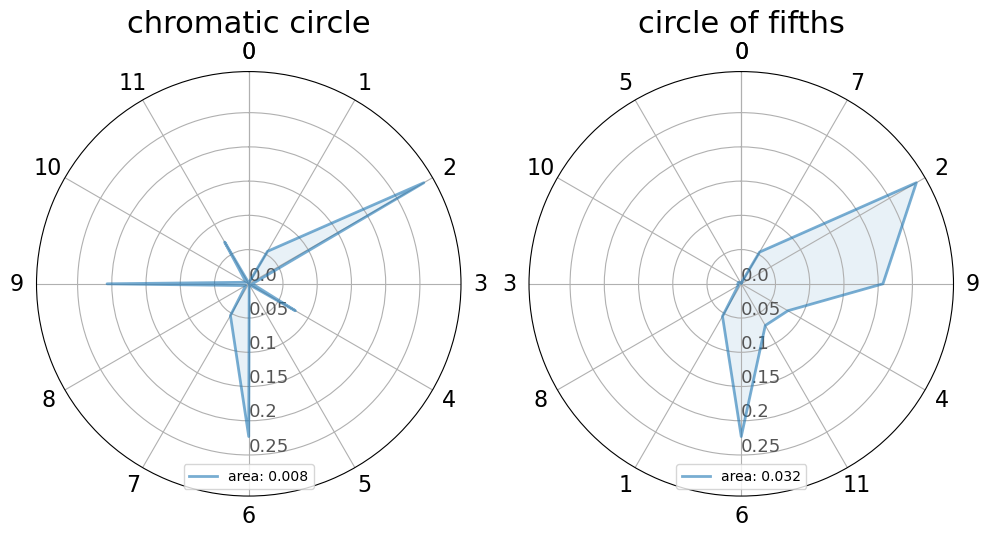

In [130]:
fifths_order = np.array([k*7 % 12 for k in range(12)])
title_size = 22
label_size = 16
area_alpha = 0.1
line_alpha = 0.6

# angle of each axis
angles = [n / float(12) * 2 * pi for n in range(12)]
# add first angle in order to close the circle
angles += angles[:1] 

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,6),subplot_kw={"polar": True})

fig.subplots_adjust(wspace=1)

for i, ax in enumerate(axes):
    if i % 2 == 0:
        subtitle = f"chromatic circle"
        idx = np.arange(12)
    else:
        subtitle = f"circle of fifths"
        idx = fifths_order

    idx = np.append(idx, idx[0])
    values = npcs.loc[piece,idx]
    
    # calculate area
    x = values * np.cos(angles)
    y = values * np.sin(angles)
    area = round(PolyArea(x,y), 3)
    
    # initialize radar plot
    ax.set_theta_offset(pi / 2) # Put first axis on top
    ax.set_theta_direction(-1) # clockwise

    # Draw angles for pitch classes
    ax.set_xticks(angles)
    ax.set_xticklabels(idx, fontdict={'fontsize':label_size})

    # set position in degrees (360°) and labels for values
    ax.set_rlabel_position(0)
    rlabels = [0.00, 0.05, 0.10, 0.15, 0.2, 0.25]
    ax.set_rticks([l for l in rlabels])
    ax.set_rlabel_position(180)
    ax.set_yticklabels(rlabels, fontdict={'fontsize':13, 'color':'#555555'})

    # cut off y-axis
    # ax.set_ylim(0, .3) 

    # format title
    ax.title.set_position([.5, 1.1])
    ax.set_title(subtitle)
    ax.title.set_fontsize(title_size)

    ax.plot(angles, values, linewidth=2, linestyle='solid', alpha=line_alpha)
    ax.fill(angles, values, alpha=area_alpha)
    ax.legend([f"area: {area}"], loc="lower center")

fig.tight_layout()

# plt.savefig("radars.eps", format="eps", dpi=600, bbox_inches="tight")
# plt.savefig("radars.png", format="png", dpi=300, bbox_inches="tight")

# fig.savefig(os.path.join("images", "radars.png"), format="png", dpi=300, bbox_inches=extent)

plt.show();

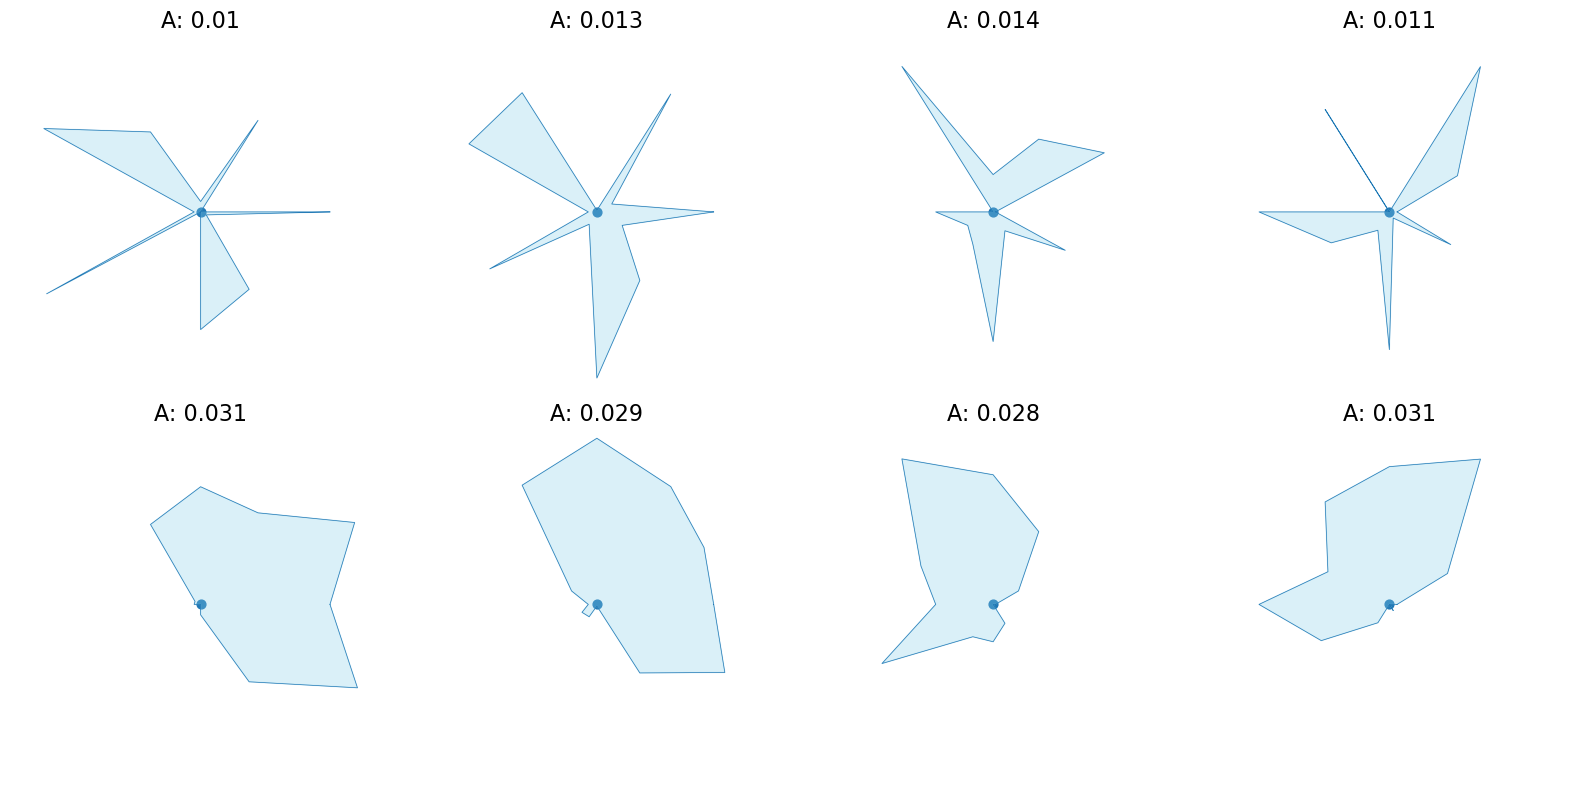

In [48]:
angles = [n / float(12) * 2 * pi for n in range(12)]

no_pieces = 4
rows = 2
margin = .01

fig, axes = plt.subplots(rows,no_pieces, figsize=(4*no_pieces,rows*4))

df = data.sample(no_pieces).reset_index(drop=True)

for i in range(no_pieces): # data.shape[0]
    for r in range(rows):
        if r % 2 == 0:
            idx = range(12)
        else:
            idx = fifths_order
            
        dist = df.loc[i,[j for j in range(12)]]
        dist /= dist.sum()
        dist = dist.reindex(idx)
        maxi = dist.max()

        x = dist.values * np.cos(angles)
        x = np.append(x,x[0])
        y = dist.values * np.sin(angles)
        y = np.append(y,y[0])

        area = round(PolyArea(x,y),3)

        axes[r,i].scatter(0,0, s=40) # mark center
        axes[r,i].plot(x,y, lw=.5)
        axes[r,i].fill(x,y, c="skyblue", alpha=.3)
        
        axes[r,i].set_title(f"A: {area}", fontsize=16)
        axes[r,i].set_xlim(-(maxi + margin),maxi+margin)
        axes[r,i].set_ylim(-(maxi+margin),maxi+margin)
        
        axes[r,i].axis("off")
    
plt.tight_layout()
plt.show()

### History

In [40]:
data["chromatic_A"] = data.loc[:,[k for k in range(12)]].apply(lambda x: chromatic_area(x), axis=1)
data["fifths_A"] = data.loc[:,[k for k in range(12)]].apply(lambda x: fifths_area(x), axis=1)

In [41]:
data.head()

,composer,composer_first,opus,no,mov,title,display_year,Fbb,Cbb,Gbb,...,4,5,6,7,8,9,10,11,chromatic_A,fifths_A
0,Vitry,Philippede,NaN,NaN,NaN,Lugentium siccentur,1361.0,0.0,0.0,0.0,...,18.0,50.0,4.0,26.0,0.0,44.0,29.0,5.0,0.012807,0.029517
1,Vitry,Philippede,NaN,NaN,NaN,Virtutibus laudabilis,1361.0,0.0,0.0,0.0,...,3.0,18.0,1.0,10.0,62.0,1.0,25.0,1.0,0.009512,0.032590
2,Vitry,Philippede,NaN,NaN,NaN,Gratissima virginis species,1361.0,0.0,0.0,0.0,...,25.0,0.0,57.0,64.0,1.0,84.0,2.0,47.0,0.009551,0.035218
3,Vitry,Philippede,NaN,NaN,NaN,Rex quem metrorum,1361.0,0.0,0.0,0.0,...,190.0,42.0,66.0,62.0,90.0,173.0,21.0,108.0,0.018313,0.023002
4,Machaut,Guillaume de,NaN,NaN,NaN,Messe de Nostre Dame - Kyrie,1370.0,0.0,0.0,0.0,...,190.0,7.0,76.0,16.0,56.0,142.0,25.0,125.0,0.012281,0.029860


In [42]:
data["ratio"] = data["chromatic_A"] / data["fifths_A"]

In [92]:
data["sum"] = data["chromatic_A"] + data["fifths_A"]

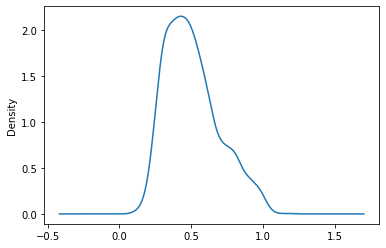

In [98]:
data["ratio"].plot(kind="kde");

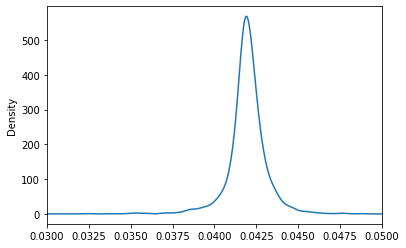

In [101]:
data["sum"].plot(kind="kde")
plt.xlim(0.03,0.05);

In [111]:
years = 200

In [112]:
data = data.sort_values(by="display_year").reset_index(drop=True)

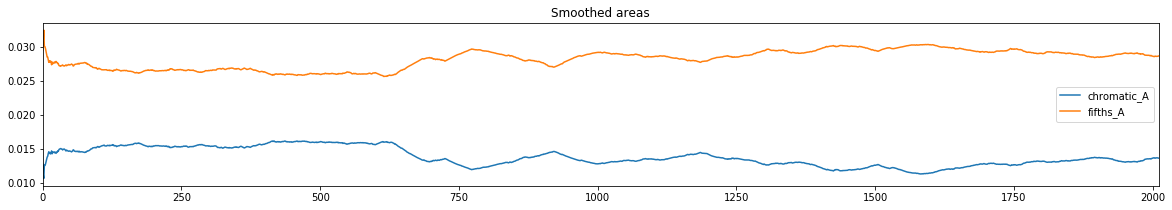

In [113]:
data[["chromatic_A", "fifths_A"]].ewm(span=years).mean().plot(figsize=(20,3), title="Smoothed areas");

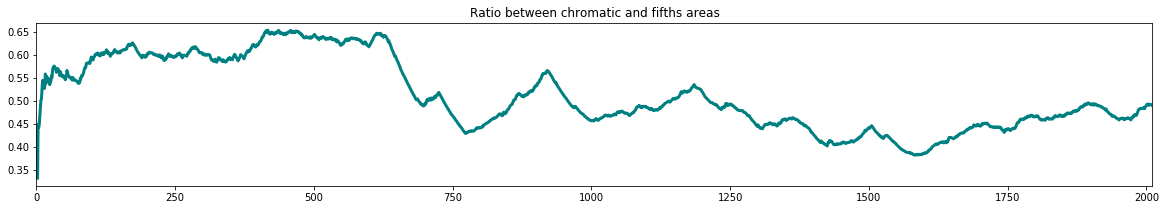

In [114]:
data["ratio"].ewm(span=years).mean().plot(figsize=(20,3), lw=3, color="teal", title="Ratio between chromatic and fifths areas");

### Aggregated by years

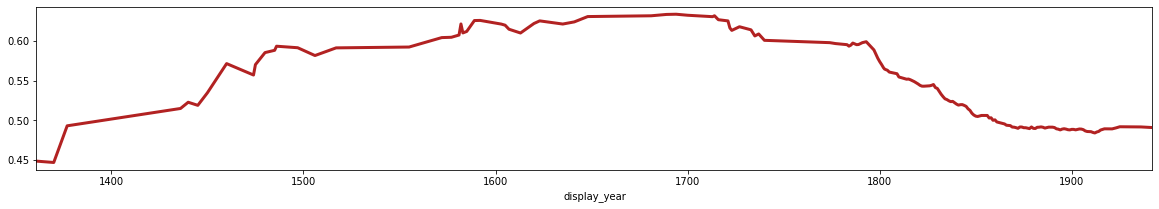

In [118]:
agg = data.sort_values("display_year").reset_index(drop=True).groupby("display_year")["ratio"].mean().ewm(span=years).mean().plot(figsize=(20,3), lw=3, color="firebrick");

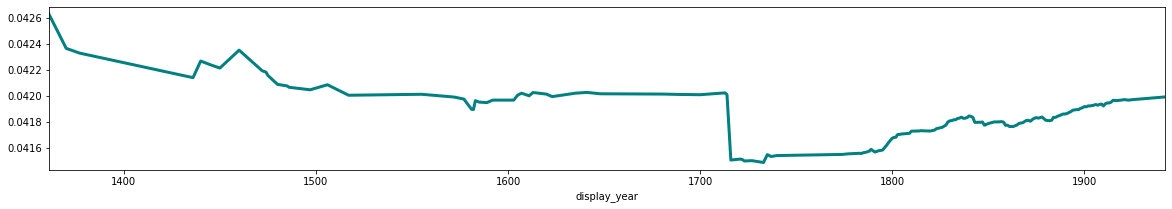

In [119]:
agg = data.sort_values("display_year").reset_index(drop=True).groupby("display_year")["sum"].mean().ewm(span=years).mean().plot(figsize=(20,3), lw=3, color="teal")

In [74]:
data.sort_values(by="ratio", ascending=False)[:12]

,composer,composer_first,opus,no,mov,title,display_year,Fbb,Cbb,Gbb,...,5,6,7,8,9,10,11,chromatic_A,fifths_A,ratio
1242,Mendelssohn,Felix,44,1,1.0,Molto allegro vivace,1838.0,0.0,0.0,0.0,...,50.0,79.0,137.0,109.0,13.0,38.0,79.0,0.023400,0.019945,1.173265
54,Dufay,Guillaume,NaN,NaN,NaN,Salve flos Tusce,1474.0,0.0,0.0,0.0,...,14.0,20.0,21.0,21.0,22.0,22.0,17.0,0.021321,0.020119,1.059728
553,Corelli,Arcangelo,6,6,5.0,NaN,1714.0,0.0,0.0,0.0,...,10.0,25.0,33.0,6.0,31.0,57.0,12.0,0.020437,0.019589,1.043298
92,Busnoys,Antoine,NaN,NaN,NaN,A qui vens tu tes coquilles,1475.0,0.0,0.0,0.0,...,39.0,37.0,62.0,47.0,29.0,33.0,30.0,0.021257,0.020499,1.036965
414,Corelli,Arcangelo,3,4,2.0,NaN,1689.0,0.0,0.0,0.0,...,495.0,14.0,76.0,76.0,214.0,86.0,79.0,0.022291,0.021913,1.017259
903,Mozart,Wolfgang Amadeus,626,NaN,NaN,Dies irae,1791.0,0.0,0.0,0.0,...,653.0,878.0,668.0,848.0,329.0,809.0,566.0,0.020811,0.020556,1.012418
910,Mozart,Wolfgang Amadeus,626,NaN,NaN,Agnus Dei,1791.0,0.0,0.0,0.0,...,12.0,64.0,67.0,17.0,37.0,54.0,8.0,0.017620,0.017458,1.009265
98,Busnoys,Antoine,NaN,NaN,NaN,Joye me fuit,1480.0,0.0,2.0,0.0,...,10.0,8.0,11.0,35.0,11.0,19.0,7.0,0.019301,0.019202,1.005143
707,Bach,Johann Sebastian,794,NaN,NaN,NaN,1723.0,0.0,0.0,0.0,...,66.0,69.0,70.0,66.0,61.0,65.0,61.0,0.020841,0.020828,1.000654
1645,Tchaikovsky,Pyotr,37a,3,NaN,March: Song of the Lark,1876.0,0.0,0.0,0.0,...,1021.0,936.0,1555.0,1743.0,1099.0,863.0,1285.0,0.020923,0.020915,1.000374
